# Time series forecasting

In [17]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import matplotlib.pyplot as plt

In [18]:
# dataset Airline-passengers

In [19]:
df=pd.read_csv("airline-passengers.csv",index_col="Month",parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [20]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0.5, 1.0, 'airline passenger')

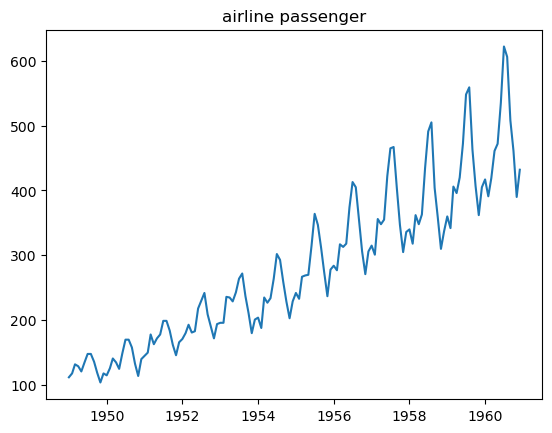

In [21]:
plt.plot(df)
plt.title("airline passenger")

In [ ]:
# the above graph indicate it is non- stationary

In [ ]:
#To make it stationary -- differentiation approach

In [ ]:
# calculate the first order difference

In [22]:
df1=df.copy()

In [23]:
df1["Passengers_diff"]=df["Passengers"].diff(periods=1)
# after shifting the data, drop the first value which is NA
df1=df1.dropna()
df1


,Passengers,Passengers_diff
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


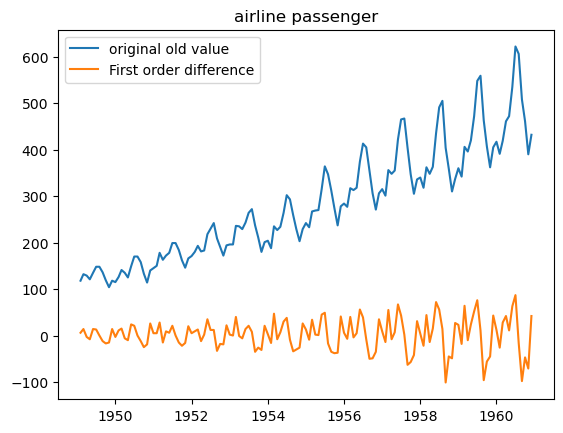

In [24]:
plt.plot(df1["Passengers"],label="original old value")
plt.plot(df1["Passengers_diff"],label="First order difference")
plt.title("airline passenger")
plt.legend()

In [25]:
# after apply the first order difference --data does'nt look completely stationary but much better
#than the original one.

In [26]:
# statistical approach to check the stationary status

# ADF Test- Augmented Dickey-Fuller test

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
result=adfuller(df1["Passengers"])

In [29]:
result

(0.7923399959692575,
 0.991511509628866,
 13,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 989.880197755545)

In [30]:
print("ADF statistics :%f" % result[0])
print("p value :%f" % result[1])

ADF statistics :0.792340
p value :0.991512


H0--> data is not stationary
H1--> data is stationary

In [ ]:
#as the p value>0.05 we are unable to reject the null hypothesis , ie the data is not stationary

In [31]:
result=adfuller(df1["Passengers_diff"])
print("ADF statistics :%f" % result[0])
print("p value :%f" % result[1])

ADF statistics :-2.829267
p value :0.054213


In [32]:
df1["Passengers_diff2"]=df["Passengers"].diff(periods=1).diff()
# after shifting the data, drop the first value which is NA
df1=df1.dropna()
df1

,Passengers,Passengers_diff,Passengers_diff2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


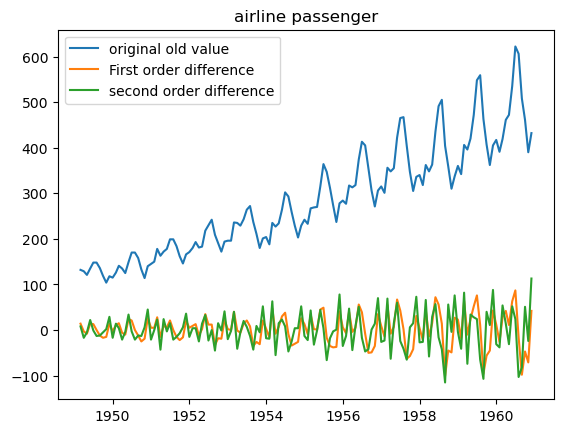

In [33]:
plt.plot(df1["Passengers"],label="original old value")
plt.plot(df1["Passengers_diff"],label="First order difference")
plt.plot(df1["Passengers_diff2"],label="second order difference")
plt.title("airline passenger")
plt.legend()

In [34]:
result=adfuller(df1["Passengers_diff2"])
print("ADF statistics :%f" % result[0])
print("p value :%f" % result[1])

ADF statistics :-16.384232
p value :0.000000


In [ ]:
# looking the impact of auto correlation after making data stationary


In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

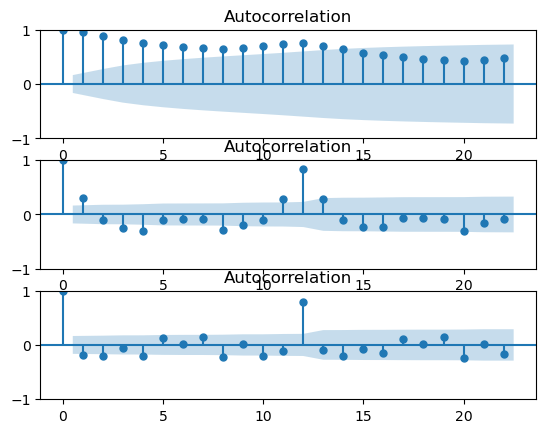

In [36]:
fig,(ax1,ax2,ax3)=plt.subplots(3)
plot_acf(df1["Passengers"],ax=ax1)
plot_acf(df1["Passengers_diff"],ax=ax2)
plot_acf(df1["Passengers_diff2"],ax=ax3)
plt.show()




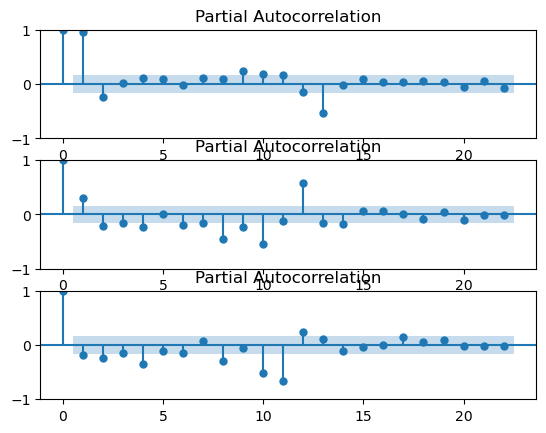

In [37]:
fig,(ax1,ax2,ax3)=plt.subplots(3)
plot_pacf(df1["Passengers"],ax=ax1)
plot_pacf(df1["Passengers_diff"],ax=ax2)
plot_pacf(df1["Passengers_diff2"],ax=ax3)
plt.show()

In [ ]:
# AR I MA  model - combination of two models AR & MA

AR--> Auto Regression - A model that uses the dependent relationship between the observation 
and lagged observation.

I--> integrated-- The use of differencing of raw observations(e.g substracting an observation
from an observation at the previous time step. )in order to make the time series stationary.

MA-- Moving Average .. A model that uses the dependency between an observation and a  residual error
from a moving averahe model applied to lagged observation.

A standard notation is used for ARIMA(p,d,q)--> p,d,q will use for transformation 
( non-stationary to stationary)
( to eliminate the serial collinearity)

In [ ]:
case 1- ARIMA(p,0,0)=AR-Autoregressive model
case 2- ARIMA(0,0,q)=MA-Moving average model

In [ ]:
# way to find p,d,q value for ARIMA 

finding p,d,q can be difficult --there are several methods.
but there are some thumb rule to make it simple.

In [ ]:
# About p,d,q values in ARIMA--- AR I MA

In [ ]:
d-->no. of differcing needed to transform the non stationary to stationary it can be 
d=0--> no differencing
d=1--> one differencing 
d=2 --> 2 differencing ... so on

In [ ]:
p--> calculate looking at PACF plots
q--> calculate looking at ACF plot

In [ ]:
Steps:-
    (1)Ignore the 0th one.
    (2)Check the lag which is very close inside the dense part.
    (3)Check the lag which next very close inside the dense part( we will start from lag 1)

In [ ]:
d=1
p=(will see the PACF) 5th is inside the shade(reference), 3rd is also very close to the shade (5-3=2)
 or otherwise 3rd we are finding very close --n-1(3-1=2)
    
q=(will see the ACF) 2nd one is very close (inside the shade)-- (2-1=1)

In [ ]:
p=2
d=1
q=1

In [40]:
from statsmodels.tsa.arima.model import ARIMA


In [41]:
model=ARIMA(df1["Passengers"],order=(2,1,1))#p,d,q

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
model_fit=model.fit()

In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  142
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -676.433
Date:                Fri, 08 Dec 2023   AIC                           1360.865
Time:                        08:03:56   BIC                           1372.660
Sample:                    03-01-1949   HQIC                          1365.658
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0909      0.084     13.043      0.000       0.927       1.255
ar.L2         -0.4890      0.098     -4.984      0.000      -0.681      -0.297
ma.L1         -0.8443      0.074    -11.376      0.000      -0.990      -0.699
sigma2       854.7274    105.937      8.068      0.000     647.094    1062.360
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.35   Prob(JB):                         0.32
Heteroskedasticity (H):               7.84   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
AIC--Akaike Information Creterion-- shows how good the model is relative to other model.
AIC=2k-2log(L-hat)
k--> no. of parameters in the model
L-hat--> Maximum value of the liklihood function for the model

In [ ]:
BIC-->Bayesian Information Creterion---> Once agin the same as AIC(lower the value better the model)
estimation of a function of the posterior probability.

In [ ]:
ARIMA(p,0,0)=AR-Autoregressive model

In [ ]:
AR(0)--White Noise- No auto regressive term
white noise- each data point is sampled with mean=0 and variance is highly unpredictable
sequence of Randomness can't be predictable.


In [ ]:
AR(1)-- Random walks and oscillations ( when p parameter in AR is 1)

In [ ]:
# lets make a prediction -- through the graphs

In [44]:
from statsmodels.graphics.tsaplots import plot_predict

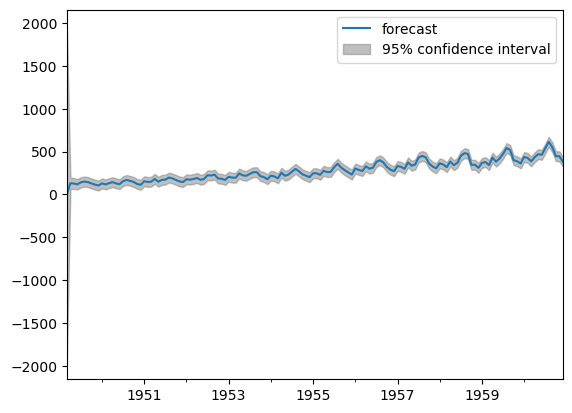

In [45]:
plot_predict(model_fit)
plt.show()

In [ ]:

# AUTO ARIMA- will help us auto selection of p,d,q




In [ ]:
#!pip install pmdarima

In [46]:
from pmdarima.arima import auto_arima

In [47]:
model=auto_arima(df1["Passengers"],start_p=1,test="adf",
    start_q=1,
    max_p=5,
    max_d=2,
    max_q=5,
    start_P=1,
    d=1,trace=True,
    seasonal=False,
    stationary=False,
    information_criterion='aic',
    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1378.648, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1397.391, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1385.745, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1381.200, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1395.947, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1380.880, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1380.391, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1377.155, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1379.584, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1384.074, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1360.865, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1378.9

In [48]:
model

ARIMA(order=(5, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [49]:
df1.head()

,Passengers,Passengers_diff,Passengers_diff2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0


In [50]:
df1.tail()

,Passengers,Passengers_diff,Passengers_diff2
Month,,,
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0
1960-11-01,390,-71.0,-24.0
1960-12-01,432,42.0,113.0


In [ ]:
# training and testing data creation

In [ ]:
"""
we have some 10 years of data. 
lets keep last 2 years as a test data.
"""

In [51]:
test_size=24
df_train=df1[:-test_size]
df_test=df1[-test_size:]

In [60]:
#plot a graph to see the pattern of training and testing-

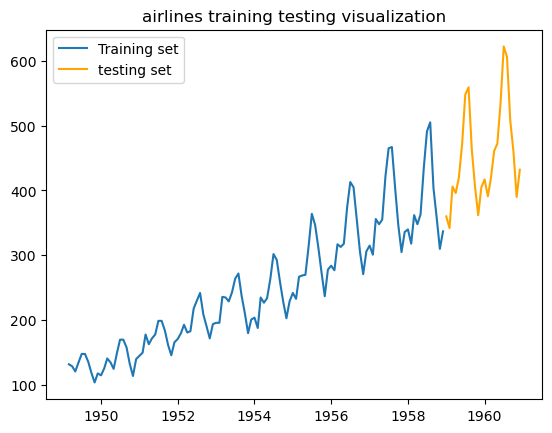

In [53]:
plt.title("airlines training testing visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")
plt.legend()

In [ ]:
# traing the model 

In [54]:
model=ARIMA(df_train["Passengers"],order=(2,1,1))

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [55]:
results=model.fit()

In [56]:
predictions=results.forecast(steps=24)

In [57]:
predictions

1959-01-01    368.099909
1959-02-01    388.452435
1959-03-01    395.439659
1959-04-01    393.276752
1959-05-01    387.681783
1959-06-01    382.749956
1959-07-01    380.141625
1959-08-01    379.692228
1959-09-01    380.443918
1959-10-01    381.455390
1959-11-01    382.176933
1959-12-01    382.467592
1960-01-01    382.436594
1960-02-01    382.266587
1960-03-01    382.100358
1960-04-01    382.003688
1960-05-01    381.979226
1960-06-01    381.998783
1960-07-01    382.031118
1960-08-01    382.056294
1960-09-01    382.067830
1960-10-01    382.068231
1960-11-01    382.063219
1960-12-01    382.057699
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
df_test["Passengers"]

Month
1959-01-01    360
1959-02-01    342
1959-03-01    406
1959-04-01    396
1959-05-01    420
1959-06-01    472
1959-07-01    548
1959-08-01    559
1959-09-01    463
1959-10-01    407
1959-11-01    362
1959-12-01    405
1960-01-01    417
1960-02-01    391
1960-03-01    419
1960-04-01    461
1960-05-01    472
1960-06-01    535
1960-07-01    622
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, dtype: int64

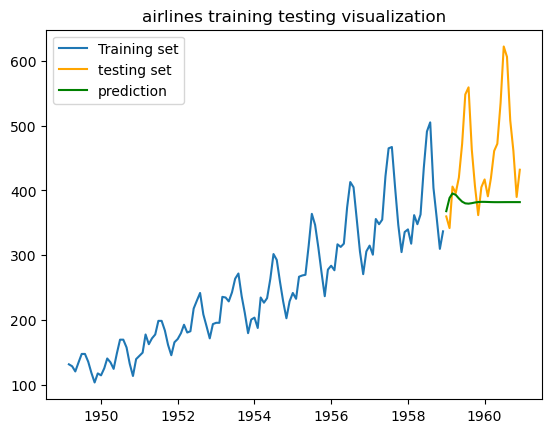

In [59]:
plt.title("airlines training testing visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")
plt.plot(predictions,label="prediction",color="green")
plt.legend()

In [ ]:
it only able to identify the level--mean

In [ ]:
# keeping the seasonal order

In [61]:
model=ARIMA(df_train["Passengers"],order=(2,1,1),seasonal_order=(2, 1, 1, 12))

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
results=model.fit()

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
predictions=results.forecast(steps=48)

In [64]:
predictions

1959-01-01    344.497231
1959-02-01    320.331903
1959-03-01    370.306026
1959-04-01    356.602989
1959-05-01    372.059562
1959-06-01    448.561122
1959-07-01    505.607509
1959-08-01    518.135875
1959-09-01    417.320830
1959-10-01    366.687326
1959-11-01    316.014159
1959-12-01    345.044954
1960-01-01    352.595091
1960-02-01    325.468259
1960-03-01    377.346292
1960-04-01    362.602094
1960-05-01    380.184089
1960-06-01    461.304480
1960-07-01    522.094614
1960-08-01    536.209932
1960-09-01    426.928945
1960-10-01    374.672065
1960-11-01    321.123525
1960-12-01    350.813654
1961-01-01    359.196651
1961-02-01    329.296814
1961-03-01    383.995430
1961-04-01    368.516026
1961-05-01    387.839599
1961-06-01    473.539565
1961-07-01    537.452194
1961-08-01    552.457324
1961-09-01    436.693118
1961-10-01    381.909019
1961-11-01    325.765313
1961-12-01    356.423602
1962-01-01    365.460510
1962-02-01    332.752594
1962-03-01    390.056410
1962-04-01    373.774521


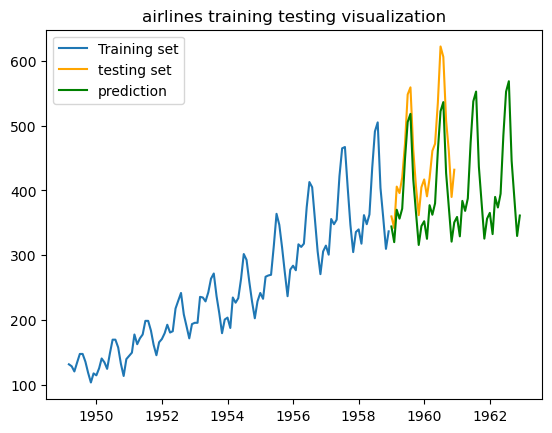

In [65]:
plt.title("airlines training testing visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")
plt.plot(predictions,label="prediction",color="green")
plt.legend()

In [ ]:
# in this case it is able to identify trend and seasonality

In [68]:
predictions1=results.forecast(steps=24)

In [74]:
# evaluation 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_test["Passengers"],predictions1,squared=False)

In [75]:
mse# root mean square if squared =False

62.31787737271495

In [77]:
rmse=np.sqrt(mean_squared_error(df_test["Passengers"],predictions1,squared=True))

In [78]:
rmse

62.31787737271495

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                       Passengers   No. Observations:                  118
Model:             ARIMA(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -388.809
Date:                          Fri, 08 Dec 2023   AIC                            791.618
Time:                                  08:33:21   BIC                            810.196
Sample:                              03-01-1949   HQIC                           799.146
                                   - 12-01-1958                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5603      4.087     -0.137      0.891      -8.571       7.450
ar.L2         -0.0543      1.283     -0.042      0.966      -2.568       2.459
ma.L1          0.2647      4.101      0.065      0.949      -7.774       8.303
ar.S.L12       0.7707      0.329      2.345      0.019       0.127       1.415
ar.S.L24       0.2265      0.113      2.011      0.044       0.006       0.447
ma.S.L12      -0.9642      1.876     -0.514      0.607      -4.640       2.712
sigma2        85.7393    128.796      0.666      0.506    -166.696     338.175
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.96   Prob(JB):                         0.66
Heteroskedasticity (H):               1.51   Skew:                             0.10
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
#SARIMAX
from statsmodels.tsa.arima.model import SARIMAX

ImportError: cannot import name 'SARIMAX' from 'statsmodels.tsa.arima.model' (C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\arima\model.py)

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
# SARIMAX-- seasonal ARIMA model 
SARIMAX- Seasonal AutoRegressive integrated moving average with eXogenous Regressors.
It cover the seasonality issue -- gives forecasting results

In [82]:
mod=SARIMAX(df_train["Passengers"],
           order=(2,1,1),seasonal_order=(2, 1, 1, 12),
           enforce_stationarity=True,
           enforce_invertibility=True)

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
results=mod.fit()
results.summary()

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  118
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -388.809
Date:                            Fri, 08 Dec 2023   AIC                            791.618
Time:                                    08:45:55   BIC                            810.196
Sample:                                03-01-1949   HQIC                           799.146
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5603      4.087     -0.137      0.891      -8.571       7.450
ar.L2         -0.0543      1.283     -0.042      0.966      -2.568       2.459
ma.L1          0.2647      4.101      0.065      0.949      -7.774       8.303
ar.S.L12       0.7707      0.329      2.345      0.019       0.127       1.415
ar.S.L24       0.2265      0.113      2.011      0.044       0.006       0.447
ma.S.L12      -0.9642      1.876     -0.514      0.607      -4.640       2.712
sigma2        85.7393    128.796      0.666      0.506    -166.696     338.175
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.96   Prob(JB):                         0.66
Heteroskedasticity (H):               1.51   Skew:                             0.10
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
mod=SARIMAX(df_train["Passengers"],
           order=(2,1,1),seasonal_order=(2, 1, 1, 12),
           enforce_stationarity=False,
           enforce_invertibility=False)

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [85]:
results=mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  118
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -298.007
Date:                            Fri, 08 Dec 2023   AIC                            610.014
Time:                                    08:46:51   BIC                            626.600
Sample:                                03-01-1949   HQIC                           616.659
                                     - 12-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2405      0.160     -7.730      0.000      -1.555      -0.926
ar.L2         -0.3214      0.126     -2.541      0.011      -0.569      -0.074
ma.L1          1.0001     21.160      0.047      0.962     -40.474      42.474
ar.S.L12      -0.7053      0.104     -6.791      0.000      -0.909      -0.502
ar.S.L24      -0.0137      0.036     -0.376      0.707      -0.085       0.058
ma.S.L12       0.9114      0.605      1.506      0.132      -0.275       2.098
sigma2        92.7467   1981.167      0.047      0.963   -3790.268    3975.762
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.84   Prob(JB):                         0.63
Heteroskedasticity (H):               0.97   Skew:                            -0.21
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
predictions2=results.forecast(24)

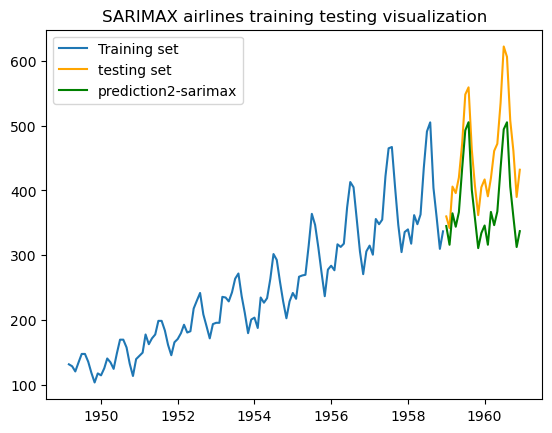

In [87]:
plt.title("SARIMAX airlines training testing visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")
plt.plot(predictions2,label="prediction2-sarimax",color="green")
plt.legend()

In [ ]:
# Exponentially weighted moving average

In [ ]:
Simple expontential smoothing -  method

we required 
(1)Alpha -smoothing parameter index
(2)span=12( if it is yearly and data collected on monthly basis)

alpha=2/(span+1)

In [88]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [89]:
span=12
alpha=2/(span+1)
model=SimpleExpSmoothing(df_train["Passengers"])
results=model.fit(smoothing_level=alpha)

predictions3=results.forecast(steps=24)

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


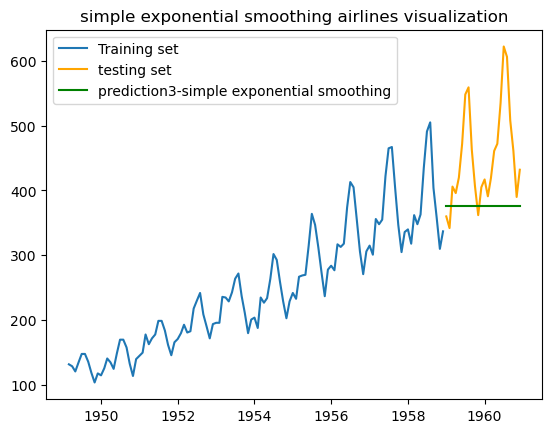

In [90]:
plt.title("simple exponential smoothing airlines visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")
plt.plot(predictions3,label="prediction3-simple exponential smoothing",color="green")
plt.legend()

In [ ]:
#here its completely neglets the trend and seasonality 
--its only predict the level

In [ ]:
# double exponential smoothing 
We can apply the addtive or multiplicative trends to build the model.

In [91]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [92]:
# additive trend
model_add=ExponentialSmoothing(df_train["Passengers"],trend="add")
result_add=model_add.fit()
predictions_add=result_add.forecast(steps=24)

# multiplicative trend
model_mul=ExponentialSmoothing(df_train["Passengers"],trend="mul")
result_mul=model_mul.fit()
predictions_mul=result_mul.forecast(steps=24)

# evaluation
rmse_add=mean_squared_error(df_test["Passengers"],predictions_add,squared=False)
rmse_mul=mean_squared_error(df_test["Passengers"],predictions_mul,squared=False)

print("RMSE ADD : ",rmse_add)
print("RMSE MUL : ",rmse_mul)

RMSE ADD :  112.26288984048865
RMSE MUL :  105.89254718161195


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


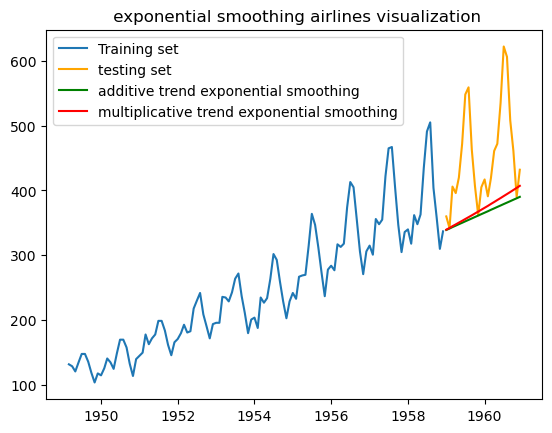

In [93]:
plt.title(" exponential smoothing airlines visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")

plt.plot(predictions_add,label="additive trend exponential smoothing",color="green")
plt.plot(predictions_mul,label="multiplicative trend exponential smoothing",color="red")
plt.legend()

In [98]:
# additive trend, seasonal additive
model_add=ExponentialSmoothing(df_train["Passengers"],trend="add",seasonal="add",seasonal_periods=12)
result_add=model_add.fit()
predictions_add_add=result_add.forecast(steps=24)

# additive trend, seasonal multiplicative
model_mul=ExponentialSmoothing(df_train["Passengers"],trend="add",seasonal="mul",seasonal_periods=12)
result_mul=model_mul.fit()
predictions_add_mul=result_mul.forecast(steps=24)

# evaluation
rmse_add_add=mean_squared_error(df_test["Passengers"],predictions_add_add,squared=False)
rmse_add_mul=mean_squared_error(df_test["Passengers"],predictions_add_mul,squared=False)

print("RMSE ADD : ",rmse_add_add)
print("RMSE MUL : ",rmse_add_mul)

RMSE ADD :  35.38284251410358
RMSE MUL :  31.891422287926154


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


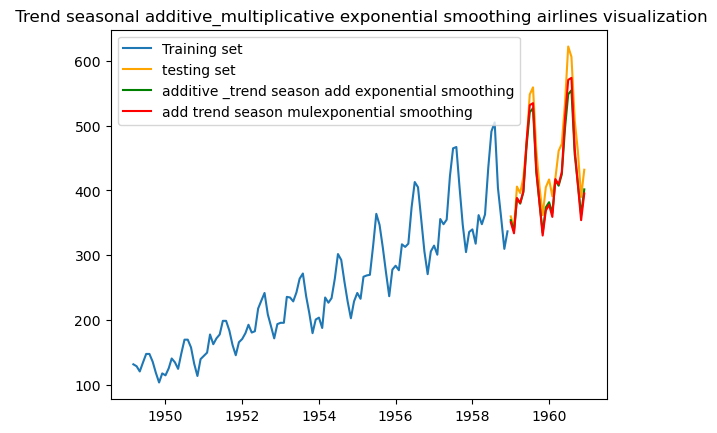

In [99]:
plt.title(" Trend seasonal additive_multiplicative exponential smoothing airlines visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")

plt.plot(predictions_add_add,label="additive _trend season add exponential smoothing",color="green")
plt.plot(predictions_add_mul,label="add trend season mulexponential smoothing",color="red")

plt.legend()

In [102]:
# additive trend, seasonal additive
model_add=ExponentialSmoothing(df_train["Passengers"],trend="mul",seasonal="add",seasonal_periods=12)
result_add=model_add.fit()
predictions_mul_add=result_add.forecast(steps=24)

# additive trend, seasonal multiplicative
model_mul=ExponentialSmoothing(df_train["Passengers"],trend="mul",seasonal="mul",seasonal_periods=12)
result_mul=model_mul.fit()
predictions_mul_mul=result_mul.forecast(steps=24)

# evaluation
rmse_mul_add=mean_squared_error(df_test["Passengers"],predictions_mul_add,squared=False)
rmse_mul_mul=mean_squared_error(df_test["Passengers"],predictions_mul_mul,squared=False)

print("RMSE ADD : ",rmse_mul_add)
print("RMSE MUL MUL : ",rmse_mul_mul)

C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE ADD :  14.23484956037752
RMSE MUL MUL :  13.782854891313395


C:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


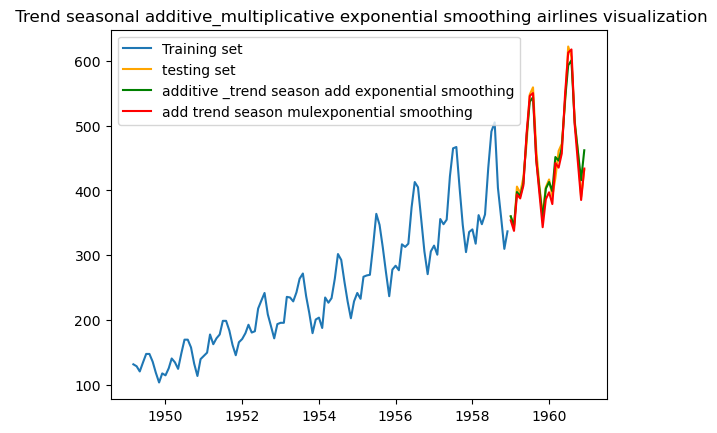

In [101]:
plt.title(" Trend seasonal additive_multiplicative exponential smoothing airlines visualization")
plt.plot(df_train["Passengers"], label="Training set")
plt.plot(df_test["Passengers"],label="testing set",color="orange")

plt.plot(predictions_mul_add,label="additive _trend season add exponential smoothing",color="green")
plt.plot(predictions_mul_mul,label="add trend season mulexponential smoothing",color="red")

plt.legend()

In [ ]:
model_mul=ExponentialSmoothing(df_train["Passengers"],trend="mul",seasonal="mul",seasonal_periods=12)
result_mul=model_mul.fit()
predictions_mul_mul=result_mul.forecast(steps=24)

In [103]:
result_mul.summary()

Dep. Variable:,Passengers,No. Observations:,118
Model:,ExponentialSmoothing,SSE,10795.223
Optimized:,True,AIC,564.909
Trend:,Multiplicative,BIC,609.240
Seasonal:,Multiplicative,AICC,571.818
Seasonal Periods:,12,Date:,"Fri, 08 Dec 2023"
Box-Cox:,False,Time:,09:29:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3835980,alpha,True
smoothing_trend,1.492e-09,beta,True
